EX1: In this exercise I implemented Bucket sort algorithm. It is a distribution sort that works by arranging elements into several ‘buckets’ which are then sorted using another sort(I used insertion sort) and merged into a sorted list. To compare bucket sort algorithm I chose the python's built-in algorithm Timsort.

In [1]:
import random, sys, time, numpy as np, math
import matplotlib.pyplot as plott

In [2]:
def bucketSort(arr):
    largest = max(arr)
    length = len(arr)
    size = largest/length
 
    buckets = [[] for _ in range(length)]
    for i in range(length):
        j = int(arr[i]/size)
        if j != length:
            buckets[j].append(arr[i])
        else:
            buckets[length - 1].append(arr[i])
 
    for i in range(length):
        insertion_sort(buckets[i])
 
    result = []
    for i in range(length):
        result = result + buckets[i]
#     print(result)
    return result
 
def insertion_sort(arr):
    for i in range(1, len(arr)):
        temp = arr[i]
        j = i - 1
        while (j >= 0 and temp < arr[j]):
            arr[j + 1] = arr[j]
            j = j - 1
        arr[j + 1] = temp

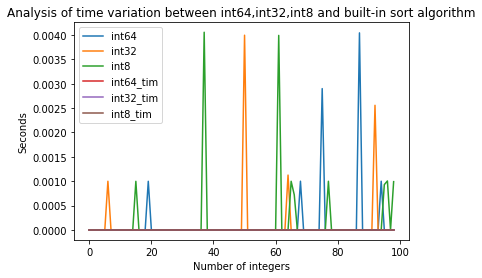

In [3]:
def measure_time(arr):
    startTime = time.time()
    bucketSort(arr.copy())
    
    duration = time.time() - startTime
    return duration
def measure_time_tim(arr):
    arr1 = arr.copy()
    startTime = time.time()
    arr1.sort()
    duration = time.time() - startTime
#     print(arr1)
    return duration
def increase():
    measures_arr_int64 = []
    measures_arr_int32 = []
    measures_arr_int8 = []
    measures_arr_int64_tim = []
    measures_arr_int32_tim = []
    measures_arr_int8_tim = []
    f_x = []
    for i in range(1,100):   
        arr_int64 = np.array(np.random.randint(0,100,i, dtype=np.int64))
        arr_int32 = arr_int64.astype(np.int32).tolist()
        arr_int8 = arr_int64.astype(np.int8).tolist()
        arr_int64 = arr_int64.tolist() 
        #int64 
        duration = measure_time(arr_int64)
        measures_arr_int64.append(duration)
        
        duration = measure_time_tim(arr_int64)
        measures_arr_int64_tim.append(duration)
        #int32 
        duration = measure_time(arr_int32)
        measures_arr_int32.append(duration)
        
        duration = measure_time_tim(arr_int32)
        measures_arr_int32_tim.append(duration)
        #int8
        duration = measure_time(arr_int8)
        measures_arr_int8.append(duration)
        
        duration = measure_time_tim(arr_int8)
        measures_arr_int8_tim.append(duration)

    
    
    plott.title("Analysis of time variation between int64,int32,int8 and built-in sort algorithm")
    plott.ylabel('Seconds')
    plott.xlabel('Number of integers')
    
    plott.plot(measures_arr_int64, label='int64')
    plott.plot(measures_arr_int32, label='int32')
    plott.plot(measures_arr_int8, label='int8')
    plott.plot(measures_arr_int64_tim, label='int64_tim')
    plott.plot(measures_arr_int32_tim, label='int32_tim')
    plott.plot(measures_arr_int8_tim, label='int8_tim')
    
    plott.legend()
    plott.show()

increase()

We can observe from the graph that with increasing the number of integers in array, bucket sort starts to sort slower than the built-in sorting algorithm - Timsort and this tendency can be observed with all types of integers(int64,int32,int8). Generally it is slower 200-300 times with big-sized arrays. I came to this conclusion by dividing duration of bucket sort algorithm in each occassion to 200 and 300 and somewhere between this numbers the graphs are similar.
On the other hand among the int types the most slow one is int64. The second one is int32 and the fastest sorting int type is int8. After this experiment we can make a conclusion that integers with smallest number of bytes are faster than integers with big amount of bytes.  